In [3]:
import os

labels_path =r"C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\dataset\labels"
label_files = []
for root, _, files in os.walk(labels_path):
    for file in files:
        if file.endswith(".txt"):
            label_files.append(os.path.join(root, file))


print(f"Toplam .txt dosyası: {len(label_files)}")


Toplam .txt dosyası: 5809


In [4]:
class_counts = []

for file in label_files:
    with open(os.path.join(labels_path, file), "r") as f:
        lines = f.readlines()
        for line in lines:
            parts = line.strip().split()
            if len(parts) == 5 and parts[0] in ["0", "1"]:
                class_counts.append(int(parts[0]))

print(f"Toplam bounding box sayısı: {len(class_counts)}")


Toplam bounding box sayısı: 382576


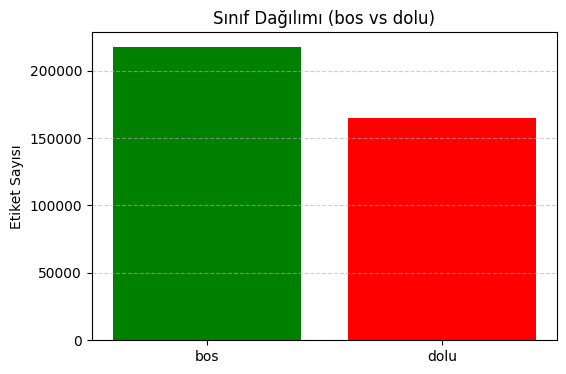

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

class_counter = Counter(class_counts) # Sınıf dağılımı
labels = ['bos', 'dolu']  # Etiketleri isimlendirelim
values = [class_counter.get(0, 0), class_counter.get(1, 0)]


plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=["green", "red"])
plt.title("Sınıf Dağılımı (bos vs dolu)")
plt.ylabel("Etiket Sayısı")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


Ortalama bbox sayısı: 65.86
Hiç etiketi olmayan görsel sayısı: 189


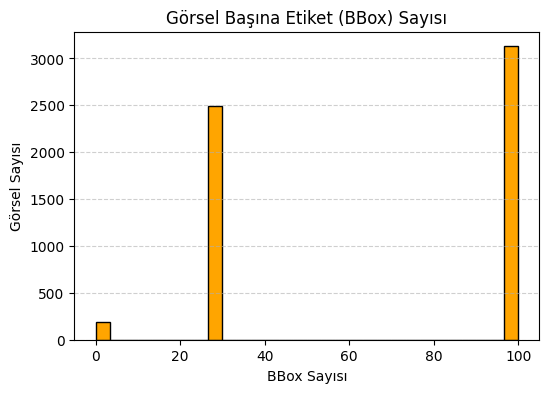

In [8]:
import matplotlib.pyplot as plt

bbox_counts_per_image = []

for file in label_files:
    with open(os.path.join(labels_path, file), "r") as f:
        lines = f.readlines()
        valid_lines = [line for line in lines if len(line.strip().split()) == 5]
        bbox_counts_per_image.append(len(valid_lines))

print(f"Ortalama bbox sayısı: {sum(bbox_counts_per_image)/len(bbox_counts_per_image):.2f}")
print(f"Hiç etiketi olmayan görsel sayısı: {bbox_counts_per_image.count(0)}")


plt.figure(figsize=(6, 4))
plt.hist(bbox_counts_per_image, bins=30, color="orange", edgecolor="black")
plt.title("Görsel Başına Etiket (BBox) Sayısı")
plt.xlabel("BBox Sayısı")
plt.ylabel("Görsel Sayısı")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [ ]:
import torch
from ultralytics import YOLO

# CUDA kullanılabilir mi?
gpu_available = torch.cuda.is_available()
print(f"CUDA (GPU) kullanılabilir mi? ➤ {'EVET ✅' if gpu_available else 'HAYIR ❌'}")

if gpu_available:
    print(f"Kullanılan GPU: {torch.cuda.get_device_name(0)}")
else:
    print("GPU yok, eğitim CPU ile yapılır.")

# Test modeli oluştur (yalnızca cihaz kontrolü için)
model = YOLO("yolov8n.pt")
print("Model aktif cihazı:", model.device)


CUDA (GPU) kullanılabilir mi? ➤ EVET ✅
Kullanılan GPU: NVIDIA GeForce RTX 3050 Ti Laptop GPU
Model aktif cihazı: cpu



Bu görselde YOLOv8 Nano modeli (yolov8n.pt) kullanılarak otopark doluluk tespiti yapan bir nesne tanıma eğitimi gerçekleştirilmiş.

Model ve Eğitim Detayları:
- Model: YOLOv8 Nano (yolov8n.pt)
- Epoch: 50
- Görüntü Boyutu: 640 piksel
- Batch Size: 16
- İşlem Birimleri: 4 iş parçacığı (workers)
- Cihaz: GPU (NVIDIA GeForce RTX 3050 Ti)

Veri Kümesi:
Yol: C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\dataset\data.yaml

Eğitim Sonuçlarının Kaydedildiği Yer:
Yol: C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\yolo_results

Eğitim Sonuçları:
- Precision (Doğruluk): 0.998
- Recall (Hassasiyet): 0.998
- mAP@0.5: 0.994
- mAP@0.5:0.95: 0.980

Ek Bilgiler:
- Model, eğitime kaldığı yerden (last.pt) devam ettirilmiş.
- En iyi model dosyası (best.pt) kaydedilmiş ve doğrulama sonuçlarıyla değerlendirilmiş.
- Eğitim süreci otomatik olarak optimize edilen AdamW optimizer ile yürütülmüş.

Bu sonuçlara göre model, boş ve dolu park alanlarını son derece başarılı şekilde ayırt edebilme kapasitesine sahip. Gerçek hayatta kullanım için oldukça iyi bir doğruluk ve genelleme performansı gösteriyor.



In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  

model.train(
    data=r"C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\dataset\data.yaml",  
    epochs=50,                     
    imgsz=640,                     
    batch=16,                       
    device=0,                       
    workers=4,                      
    name="yolo_parking_v2",        
    project=r"C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\yolo_results", 
    exist_ok=True                   
)


New https://pypi.org/project/ultralytics/8.3.137 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.136  Python-3.13.2 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\omerp\Masast\OtoparkTakipSistemi2\dataset\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, nam

100%|██████████| 5.35M/5.35M [00:01<00:00, 3.55MB/s]


AMP: checks passed 
train: Fast image access  (ping: 0.00.0 ms, read: 20.23.5 MB/s, size: 149.4 KB)


train: Scanning C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\dataset\labels\train... 4648 images, 157 backgrounds, 0 corrupt: 100%|██████████| 4648/4648 [00:05<00:00, 917.60it/s]


train: New cache created: C:\Users\omerp\Masast\OtoparkTakipSistemi2\dataset\labels\train.cache
val: Fast image access  (ping: 0.10.0 ms, read: 15.14.4 MB/s, size: 147.4 KB)


val: Scanning C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\dataset\labels\val... 1161 images, 32 backgrounds, 0 corrupt: 100%|██████████| 1161/1161 [00:01<00:00, 582.64it/s]

val: New cache created: C:\Users\omerp\Masast\OtoparkTakipSistemi2\dataset\labels\val.cache


Plotting labels to C:\Users\omerp\Masast\OtoparkTakipSistemi2\yolo_results\yolo_parking_v2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to C:\Users\omerp\Masast\OtoparkTakipSistemi2\yolo_results\yolo_parking_v2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         6G      1.528      1.385      1.031       1412        640: 100%|██████████| 291/291 [09:58<00:00,  2.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:13<00:00,  2.68it/s]


                   all       1161      75388      0.887      0.929      0.953      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.41G      1.041     0.6669     0.8863       1133        640: 100%|██████████| 291/291 [13:09<00:00,  2.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:22<00:00,  1.67it/s]


                   all       1161      75388      0.941      0.963       0.98      0.747

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.18G     0.9187     0.5874      0.863       1122        640: 100%|██████████| 291/291 [37:46<00:00,  7.79s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  4.02it/s]


                   all       1161      75388      0.939      0.962      0.977      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.97G     0.8408     0.5355     0.8469        928        640: 100%|██████████| 291/291 [12:57<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  4.07it/s]


                   all       1161      75388      0.904      0.914      0.984      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      8.29G     0.7902     0.5075     0.8378        777        640: 100%|██████████| 291/291 [08:33<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:10<00:00,  3.54it/s]


                   all       1161      75388      0.962      0.953      0.991      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.41G     0.7325     0.4687     0.8278       1105        640: 100%|██████████| 291/291 [12:56<00:00,  2.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  3.92it/s]


                   all       1161      75388       0.97      0.969      0.992      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.78G     0.6968     0.4496     0.8237        841        640: 100%|██████████| 291/291 [17:17<00:00,  3.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:07<00:00,  1.83s/it]


                   all       1161      75388      0.976      0.974      0.993      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.13G     0.6574     0.4172     0.8183       1200        640: 100%|██████████| 291/291 [10:01<00:00,  2.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.51it/s]


                   all       1161      75388      0.988      0.988      0.993      0.881

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.86G     0.6419     0.4083     0.8162        781        640: 100%|██████████| 291/291 [11:26<00:00,  2.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.41it/s]


                   all       1161      75388      0.994      0.991      0.994      0.891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.83G     0.6169     0.3946     0.8124        988        640: 100%|██████████| 291/291 [06:20<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.22it/s]


                   all       1161      75388      0.992      0.993      0.994      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.37G     0.6023     0.3803     0.8102        879        640: 100%|██████████| 291/291 [15:09<00:00,  3.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  4.02it/s]


                   all       1161      75388      0.996      0.994      0.994      0.898

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.08G     0.5911     0.3752     0.8092       1168        640: 100%|██████████| 291/291 [12:04<00:00,  2.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.50it/s]

                   all       1161      75388      0.987      0.983      0.993       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.36G     0.5775     0.3733     0.8074        864        640: 100%|██████████| 291/291 [12:32<00:00,  2.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.33it/s]


                   all       1161      75388      0.996      0.995      0.994      0.905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.61G     0.5606     0.3548      0.806       1481        640:  69%|██████▉   | 202/291 [24:04<10:36,  7.15s/it]


KeyboardInterrupt: 

In [1]:
from ultralytics import YOLO

# Son ağırlığı yükle
model = YOLO(r"C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\yolo_results\yolo_parking_v2\weights\last.pt")

# Kaldığı yerden devam ettir
model.train(
    data=r"C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\dataset\data.yaml",
    epochs=50,  # Hedef epoch (model otomatik olarak kalan epoch'u hesaplar)
    resume=True,
    batch=16,
    imgsz=640,
    device=0,
    workers=4,
    name="yolo_parking_v2",
    project=r"C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\yolo_results",
    exist_ok=True
)


New https://pypi.org/project/ultralytics/8.3.138 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.136  Python-3.13.2 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\omerp\Masast\OtoparkTakipSistemi2\dataset\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=C:\Users\omerp\Masast\OtoparkTakipSistemi2\yolo_results\yolo_p

train: Scanning C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\dataset\labels\train.cache... 4648 images, 157 backgrounds, 0 corrupt: 100%|██████████| 4648/4648 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 135.415.8 MB/s, size: 147.4 KB)


val: Scanning C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\dataset\labels\val.cache... 1161 images, 32 backgrounds, 0 corrupt: 100%|██████████| 1161/1161 [00:00<?, ?it/s]


Plotting labels to C:\Users\omerp\Masast\OtoparkTakipSistemi2\yolo_results\yolo_parking_v2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training C:\Users\omerp\Masast\OtoparkTakipSistemi2\yolo_results\yolo_parking_v2\weights\last.pt from epoch 14 to 50 total epochs
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to C:\Users\omerp\Masast\OtoparkTakipSistemi2\yolo_results\yolo_parking_v2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.99G     0.5608     0.3545     0.8064       1412        640: 100%|██████████| 291/291 [05:04<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.27it/s]


                   all       1161      75388      0.996      0.994      0.994      0.914

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.39G     0.5533     0.3495     0.8046       1133        640: 100%|██████████| 291/291 [10:30<00:00,  2.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.37it/s]


                   all       1161      75388      0.996      0.995      0.994      0.916

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.16G     0.5347     0.3373     0.8031       1122        640: 100%|██████████| 291/291 [08:44<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.40it/s]


                   all       1161      75388      0.997      0.996      0.994      0.917

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.97G     0.5268      0.334     0.8017        928        640: 100%|██████████| 291/291 [08:42<00:00,  1.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.36it/s]

                   all       1161      75388      0.997      0.996      0.994      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.27G     0.5143     0.3198     0.8004        777        640: 100%|██████████| 291/291 [11:46<00:00,  2.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.43it/s]

                   all       1161      75388      0.996      0.994      0.994      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.38G     0.5169     0.3231     0.7995       1105        640: 100%|██████████| 291/291 [24:29<00:00,  5.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:20<00:00,  2.16s/it]

                   all       1161      75388      0.996      0.995      0.994      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.76G     0.4952     0.3143     0.7981        841        640: 100%|██████████| 291/291 [08:09<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  3.88it/s]

                   all       1161      75388      0.995      0.994      0.994      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.12G     0.4823     0.3034     0.7962       1200        640: 100%|██████████| 291/291 [08:00<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  4.07it/s]


                   all       1161      75388      0.998      0.998      0.994      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.81G     0.4776     0.2992     0.7958        781        640: 100%|██████████| 291/291 [10:42<00:00,  2.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.19it/s]

                   all       1161      75388      0.998      0.997      0.994      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.81G     0.4681     0.2973     0.7943        988        640: 100%|██████████| 291/291 [08:40<00:00,  1.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.16it/s]

                   all       1161      75388      0.997      0.997      0.994      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.36G     0.4636     0.2924     0.7936        879        640: 100%|██████████| 291/291 [15:01<00:00,  3.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.37it/s]

                   all       1161      75388      0.998      0.997      0.994      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.08G     0.4594     0.2916     0.7936       1168        640: 100%|██████████| 291/291 [12:18<00:00,  2.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.52it/s]

                   all       1161      75388      0.997      0.997      0.994      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.34G     0.4559     0.2947     0.7936       1939        640:  76%|███████▌  | 220/291 [09:30<03:03,  2.59s/it]


KeyboardInterrupt: 

In [1]:
from ultralytics import YOLO

# Son ağırlığı yükle
model = YOLO(r"C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\yolo_results\yolo_parking_v2\weights\last.pt")

# Kaldığı yerden devam ettir
model.train(
    data=r"C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\dataset\data.yaml",
    epochs=50,  # Hedef epoch (model otomatik olarak kalan epoch'u hesaplar)
    resume=True,
    batch=16,
    imgsz=640,
    device=0,
    workers=4,
    name="yolo_parking_v2",
    project=r"C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\yolo_results",
    exist_ok=True
)


New https://pypi.org/project/ultralytics/8.3.138 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.136  Python-3.13.2 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\omerp\Masast\OtoparkTakipSistemi2\dataset\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=C:\Users\omerp\Masast\OtoparkTakipSistemi2\yolo_results\yolo_p

train: Scanning C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\dataset\labels\train.cache... 4648 images, 157 backgrounds, 0 corrupt: 100%|██████████| 4648/4648 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.00.0 ms, read: 125.539.2 MB/s, size: 147.4 KB)


val: Scanning C:\Users\omerp\Masaüstü\OtoparkTakipSistemi2\dataset\labels\val.cache... 1161 images, 32 backgrounds, 0 corrupt: 100%|██████████| 1161/1161 [00:00<?, ?it/s]


Plotting labels to C:\Users\omerp\Masast\OtoparkTakipSistemi2\yolo_results\yolo_parking_v2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training C:\Users\omerp\Masast\OtoparkTakipSistemi2\yolo_results\yolo_parking_v2\weights\last.pt from epoch 26 to 50 total epochs
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to C:\Users\omerp\Masast\OtoparkTakipSistemi2\yolo_results\yolo_parking_v2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.99G     0.4622     0.2948     0.7944       1412        640: 100%|██████████| 291/291 [08:19<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  4.01it/s]


                   all       1161      75388      0.998      0.998      0.994      0.948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.39G     0.4448     0.2844      0.792       1133        640: 100%|██████████| 291/291 [11:16<00:00,  2.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.55it/s]

                   all       1161      75388      0.998      0.997      0.994      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.16G     0.4331     0.2799      0.791       1122        640: 100%|██████████| 291/291 [09:33<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.56it/s]

                   all       1161      75388      0.998      0.998      0.994      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.97G     0.4311     0.2757     0.7908        928        640: 100%|██████████| 291/291 [08:47<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.51it/s]

                   all       1161      75388      0.998      0.998      0.994      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      8.27G     0.4279     0.2721     0.7907        777        640: 100%|██████████| 291/291 [13:30<00:00,  2.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  3.84it/s]

                   all       1161      75388      0.998      0.997      0.994      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.38G     0.4255     0.2708     0.7893       1105        640: 100%|██████████| 291/291 [21:59<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [01:32<00:00,  2.49s/it]

                   all       1161      75388      0.998      0.998      0.994      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.76G     0.4148     0.2678     0.7891        841        640: 100%|██████████| 291/291 [14:51<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:12<00:00,  2.89it/s]


                   all       1161      75388      0.998      0.997      0.994      0.958

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.12G      0.406     0.2619      0.788       1200        640: 100%|██████████| 291/291 [11:10<00:00,  2.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  4.05it/s]


                   all       1161      75388      0.998      0.998      0.994      0.965

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.81G     0.4003     0.2581     0.7876        781        640: 100%|██████████| 291/291 [13:47<00:00,  2.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.24it/s]

                   all       1161      75388      0.998      0.998      0.994      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.81G     0.3911     0.2559     0.7862        988        640: 100%|██████████| 291/291 [09:28<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.37it/s]

                   all       1161      75388      0.998      0.998      0.994       0.96



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.36G     0.3917     0.2557     0.7862        879        640: 100%|██████████| 291/291 [17:07<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.17it/s]


                   all       1161      75388      0.998      0.998      0.994      0.967

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.08G     0.3924     0.2554     0.7866       1168        640: 100%|██████████| 291/291 [12:40<00:00,  2.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.32it/s]

                   all       1161      75388      0.998      0.998      0.994      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.35G      0.391     0.2583     0.7869        864        640: 100%|██████████| 291/291 [13:56<00:00,  2.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.57it/s]

                   all       1161      75388      0.998      0.998      0.994      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.59G      0.387     0.2545     0.7865       1105        640: 100%|██████████| 291/291 [40:34<00:00,  8.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [02:14<00:00,  3.62s/it]

                   all       1161      75388      0.998      0.998      0.994      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.24G     0.3802     0.2515     0.7856        969        640: 100%|██████████| 291/291 [11:05<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:55<00:00,  1.50s/it]

                   all       1161      75388      0.998      0.998      0.994       0.97


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.38G     0.3375     0.2274      0.777        575        640: 100%|██████████| 291/291 [01:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.44it/s]

                   all       1161      75388      0.998      0.998      0.994      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.38G     0.3229     0.2191     0.7752        646        640: 100%|██████████| 291/291 [01:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.42it/s]

                   all       1161      75388      0.998      0.998      0.994      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.37G     0.3153     0.2155     0.7751        481        640: 100%|██████████| 291/291 [01:04<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:09<00:00,  4.06it/s]

                   all       1161      75388      0.999      0.998      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.38G     0.3075     0.2127     0.7745        556        640: 100%|██████████| 291/291 [01:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.12it/s]

                   all       1161      75388      0.998      0.998      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.38G     0.3018     0.2102     0.7745        584        640: 100%|██████████| 291/291 [01:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.40it/s]

                   all       1161      75388      0.998      0.998      0.994      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.38G     0.2954     0.2072     0.7734        575        640: 100%|██████████| 291/291 [01:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.51it/s]

                   all       1161      75388      0.998      0.998      0.994      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.37G     0.2932     0.2056     0.7735        556        640: 100%|██████████| 291/291 [01:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.42it/s]

                   all       1161      75388      0.998      0.998      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.38G      0.286     0.2028     0.7728        362        640: 100%|██████████| 291/291 [01:05<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:10<00:00,  3.49it/s]

                   all       1161      75388      0.998      0.998      0.994      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.38G     0.2818     0.2012     0.7718        574        640: 100%|██████████| 291/291 [01:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.27it/s]

                   all       1161      75388      0.998      0.998      0.994      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.38G     0.2706     0.1966      0.771        582        640: 100%|██████████| 291/291 [01:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:08<00:00,  4.23it/s]

                   all       1161      75388      0.998      0.998      0.994       0.98



25 epochs completed in 3.954 hours.
Optimizer stripped from C:\Users\omerp\Masast\OtoparkTakipSistemi2\yolo_results\yolo_parking_v2\weights\last.pt, 6.2MB
Optimizer stripped from C:\Users\omerp\Masast\OtoparkTakipSistemi2\yolo_results\yolo_parking_v2\weights\best.pt, 6.2MB

Validating C:\Users\omerp\Masast\OtoparkTakipSistemi2\yolo_results\yolo_parking_v2\weights\best.pt...
Ultralytics 8.3.136  Python-3.13.2 torch-2.7.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:24<00:00,  1.48it/s]


                   all       1161      75388      0.998      0.998      0.994       0.98
                   bos       1021      43416      0.999      0.998      0.995      0.985
                  dolu        880      31972      0.998      0.998      0.994      0.975
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to C:\Users\omerp\Masast\OtoparkTakipSistemi2\yolo_results\yolo_parking_v2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000027C9F029A90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [2]:
from ultralytics import YOLO

model = YOLO("./yolo_results/yolo_parking_v2/weights/best.pt")
model.predict(
    source="./dataset/images/val",
    save=True,
    save_txt=True,
    project="./inference_results/val_predictions",
    name="val_predictions",
    imgsz=640
)



WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1161 c:\Users\omerp\Masast\OtoparkTakipSistemi2\dataset\images\val\2012-09-11_15_16_58.jpg: 384x640 34 boss, 67 dolus, 51.4ms
image 2/1161 c:\Users\omerp\Masast\OtoparkTakipSistemi2\dataset\images\val\2012-09-11_15_27_08.jpg: 384x640 34 boss, 68 dolus, 7.0ms
image 3/1161 c:\Users\omerp\Masast\OtoparkTakipSistemi2\dataset\images\val\2012-09-11_15_43_35.jpg: 384x640 30 boss, 74 dolus, 7.3ms
image 4/1161 c:\Users\omerp\Masast\OtoparkTakipSistemi2\dat

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'bos', 1: 'dolu'}
 obb: None
 orig_img: array([[[ 66,  78, 106],
         [ 80,  93, 119],
         [104, 115, 142],
         ...,
         [ 70, 140, 133],
         [ 72, 139, 130],
         [ 71, 138, 129]],
 
        [[106, 118, 146],
         [114, 127, 153],
         [128, 140, 164],
         ...,
         [ 76, 144, 137],
         [ 78, 145, 136],
         [ 80, 147, 138]],
 
        [[136, 151, 177],
         [138, 153, 179],
         [144, 158, 181],
         ...,
         [ 73, 141, 134],
         [ 73, 140, 133],
         [ 75, 139, 133]],
 
        ...,
 
        [[ 90,  79,  71],
         [ 90,  79,  71],
         [ 91,  80,  72],
         ...,
         [ 71,  74,  72],
         [ 69,  72,  70],
         [ 64,  69,  67]],
 
        [[ 90,  79,  71],
         [ 91,  80,  72],
         [ 91,  80,  72],
         ...,
         [